# Deskripsi Library yang dipakai

#

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('toyota.csv')
df_numeric = df.apply(pd.to_numeric, errors='coerce')





In [22]:
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,GT86,2016,16000,Manual,24089,Petrol,265,36.2,2.0
1,GT86,2017,15995,Manual,18615,Petrol,145,36.2,2.0
2,GT86,2015,13998,Manual,27469,Petrol,265,36.2,2.0
3,GT86,2017,18998,Manual,14736,Petrol,150,36.2,2.0
4,GT86,2017,17498,Manual,36284,Petrol,145,36.2,2.0


In [23]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6738 entries, 0 to 6737
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         6738 non-null   object 
 1   year          6738 non-null   int64  
 2   price         6738 non-null   int64  
 3   transmission  6738 non-null   object 
 4   mileage       6738 non-null   int64  
 5   fuelType      6738 non-null   object 
 6   tax           6738 non-null   int64  
 7   mpg           6738 non-null   float64
 8   engineSize    6738 non-null   float64
dtypes: float64(2), int64(4), object(3)
memory usage: 473.9+ KB


In [24]:
df.describe()

,year,price,mileage,tax,mpg,engineSize
count,6738.000000,6738.000000,6738.000000,6738.000000,6738.000000,6738.000000
mean,2016.748145,12522.391066,22857.413921,94.697240,63.042223,1.471297
std,2.204062,6345.017587,19125.464147,73.880776,15.836710,0.436159
min,1998.000000,850.000000,2.000000,0.000000,2.800000,0.000000
25%,2016.000000,8290.000000,9446.000000,0.000000,55.400000,1.000000
50%,2017.000000,10795.000000,18513.000000,135.000000,62.800000,1.500000
75%,2018.000000,14995.000000,31063.750000,145.000000,69.000000,1.800000
max,2020.000000,59995.000000,174419.000000,565.000000,235.000000,4.500000


<Axes: >

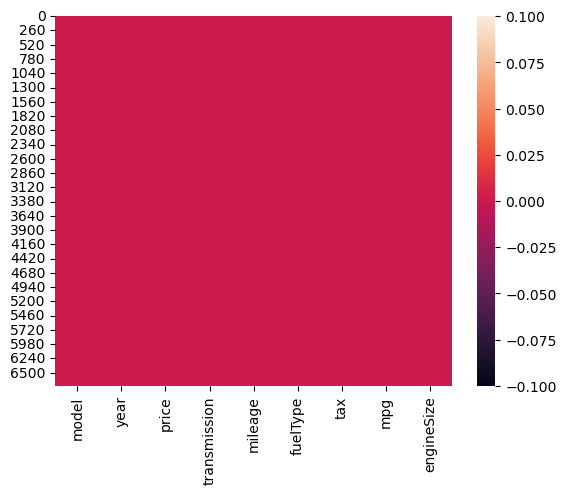

In [25]:
sns.heatmap(df.isnull())

In [26]:
df_numeric = df.apply(pd.to_numeric, errors='coerce')
df.describe()

,year,price,mileage,tax,mpg,engineSize
count,6738.000000,6738.000000,6738.000000,6738.000000,6738.000000,6738.000000
mean,2016.748145,12522.391066,22857.413921,94.697240,63.042223,1.471297
std,2.204062,6345.017587,19125.464147,73.880776,15.836710,0.436159
min,1998.000000,850.000000,2.000000,0.000000,2.800000,0.000000
25%,2016.000000,8290.000000,9446.000000,0.000000,55.400000,1.000000
50%,2017.000000,10795.000000,18513.000000,135.000000,62.800000,1.500000
75%,2018.000000,14995.000000,31063.750000,145.000000,69.000000,1.800000
max,2020.000000,59995.000000,174419.000000,565.000000,235.000000,4.500000


<Axes: >

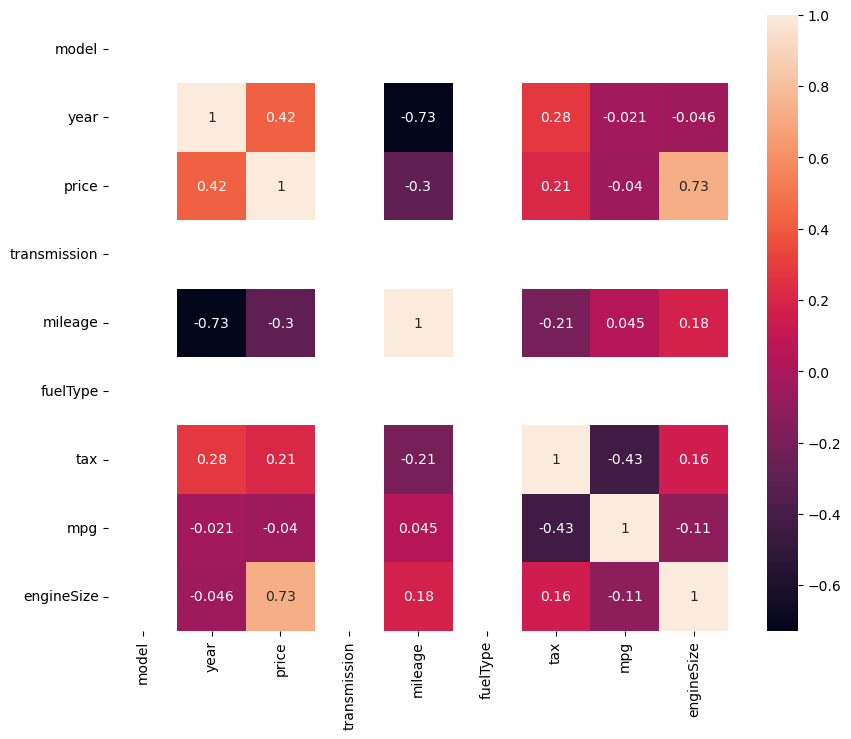

In [27]:
plt.figure(figsize=(10, 8))
sns.heatmap(df_numeric.corr(), annot=True)

# Jumlah mobil berdasarkan model

In [28]:
models = df.groupby('model').count()[['tax']].sort_values(by='tax',ascending=True).reset_index()
models = models.rename(columns={'tax':'numberOfcars'})

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17],
 [Text(0, 0, ' Verso-S'),
  Text(1, 0, ' Urban Cruiser'),
  Text(2, 0, ' IQ'),
  Text(3, 0, ' Camry'),
  Text(4, 0, ' Supra'),
  Text(5, 0, ' PROACE VERSO'),
  Text(6, 0, ' Land Cruiser'),
  Text(7, 0, ' GT86'),
  Text(8, 0, ' Hilux'),
  Text(9, 0, ' Verso'),
  Text(10, 0, ' Avensis'),
  Text(11, 0, ' Prius'),
  Text(12, 0, ' Corolla'),
  Text(13, 0, ' RAV4'),
  Text(14, 0, ' C-HR'),
  Text(15, 0, ' Auris'),
  Text(16, 0, ' Aygo'),
  Text(17, 0, ' Yaris')])

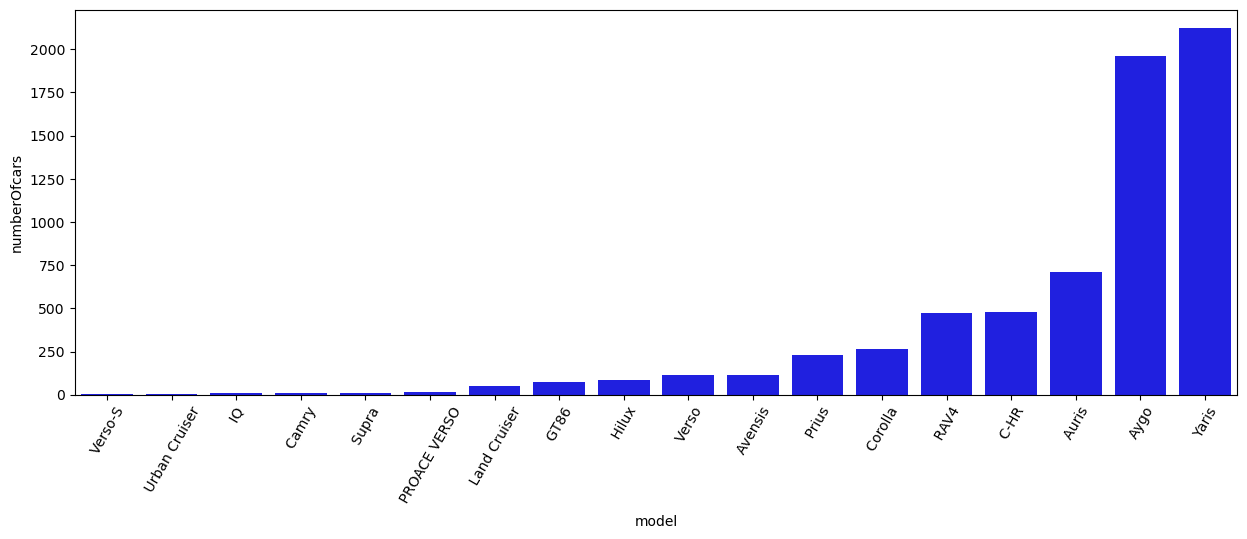

In [29]:
fig = plt.figure(figsize=(15, 5))
sns.barplot(x=models['model'],y=models['numberOfcars'], color='blue')
plt.xticks(rotation=60)

In [30]:
engine = df.groupby('engineSize').count()[['tax']].sort_values(by='tax',ascending=True).reset_index()
engine = engine.rename(columns={'tax':'count'})

<Axes: xlabel='engineSize', ylabel='count'>

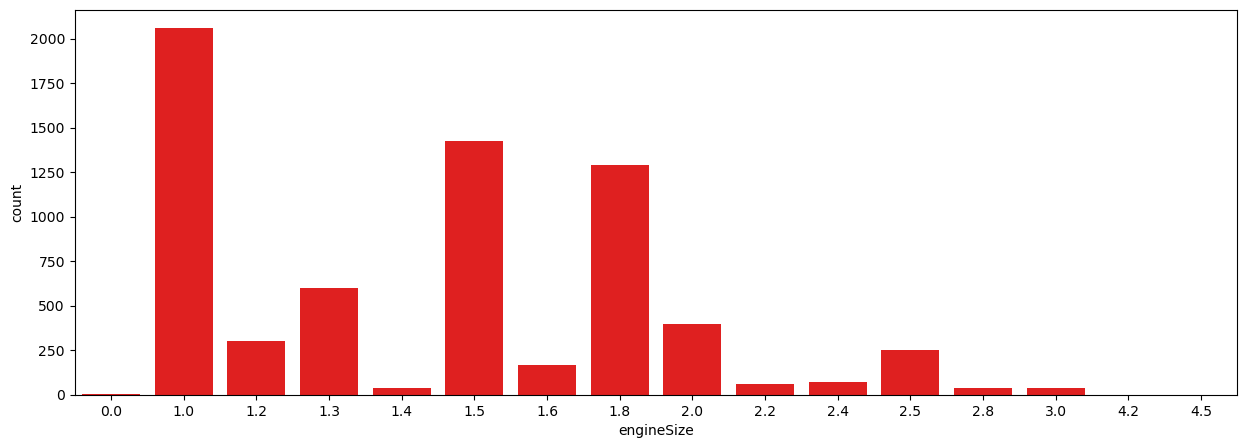

In [31]:
fig = plt.figure(figsize=(15, 5))
sns.barplot(x=engine['engineSize'], y=engine['count'], color='red')


C:\Users\hckrm\AppData\Local\Temp\ipykernel_12028\2452301774.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['mileage'], color='skyblue')


<Axes: xlabel='mileage', ylabel='Density'>

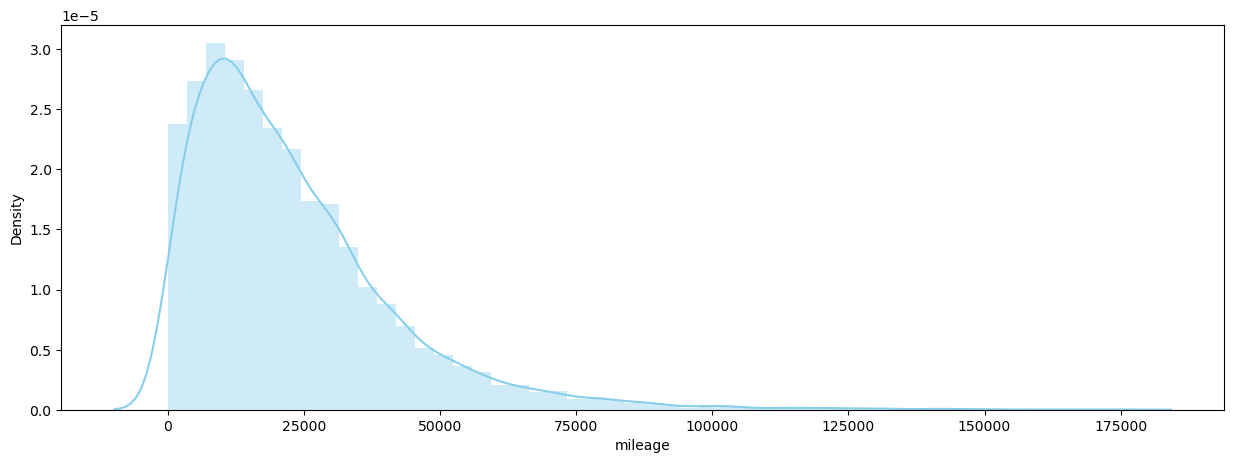

In [32]:
plt.figure(figsize=(15, 5))
sns.distplot(df['mileage'], color='skyblue')

C:\Users\hckrm\AppData\Local\Temp\ipykernel_12028\3597024019.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price'], color='skyblue')


<Axes: xlabel='price', ylabel='Density'>

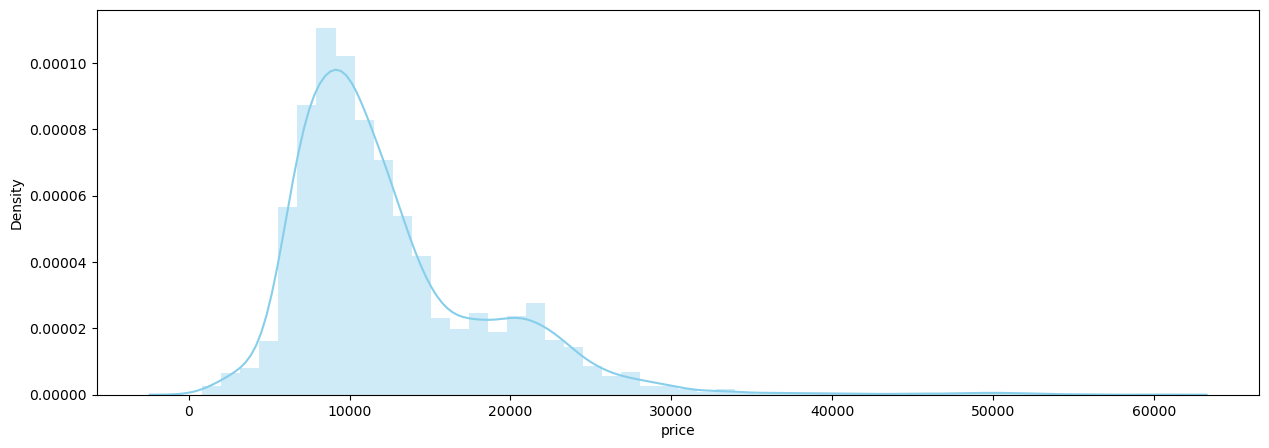

In [33]:
plt.figure(figsize=(15, 5))
sns.distplot(df['price'], color='skyblue')

# Seleksi Fitur

In [34]:
features = ['year', 'mileage', 'tax', 'mpg', 'engineSize']
x = df[features]
y = df['price']
x.shape, y.shape

((6738, 5), (6738,))

# Split Data Training dan Data Testing 

In [35]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=70)
y_test.shape

(1685,)

Model Regresi Linier

In [36]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)
pred = lr.predict(x_test)

In [37]:
score = lr.score(x_test, y_test)
print('Akurasi model Regresi Linier =', score)

Akurasi model Regresi Linier = 0.7678983314475204


# Membuat inputan model regresi linier

In [38]:
#year=2018, mile=10000, tax=135, mpg, 30.2, engineSize=2
input_data = np.array([[2018, 10000, 135, 30.2, 2 ]])

prediction = lr.predict(input_data)
print('Estimasi Harga Mobil dalam ponds= :', prediction)

Estimasi Harga Mobil dalam ponds= : [19989.18167592]


z:\DivineSoftware\Anaconda\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [39]:
import pickle

filename = 'estimasi_mobil.sav'
pickle.dump(lr,open(filename,'wb'))